# Решающие деревья

На прошлых лекциях были разобраны линейные методы классификации и регрессии.

"+" линейных моделей:
* Могут выявить зависимость на маленьком объеме данных
* "Интерпретируемость" (значимость) признаков
* могут справляться с большими объемами данных
* быстрый инференс
* хороши для задачи экстраполяции


"-" линейных моделей:
* вявляет линейные зависимости
* усволия Гаусса-Маркова (гомоскедастичность, нулевое мат ожидание ошибки, нескоррелированные ошибки)


Сегодня мы рассмотрим ещё одно семейство алгоритмов - решающие деревья - которые, в свою очередь, способны восстанавливать нелинейные зависимости.

"+" линейных моделей: 
* измерить "значимости" признаков
* Мало количество параметров (пропорционально количеству признаков)

"-" линейных моделей:
* описывает только линейные зависимости целевой переменной от признаков

Данное семейство алгоритмов вам, скорее всего, знакомо из повседневной жизни. Приведем пример:

Схема принятия решения (инструкция с сайта НИУ ВШЭ)

<img src="instruction.png">


Вы устраиваетесь на работу:

<img src="job_decision_tree.png">

Также, подобные схемы раньше использовались при выдаче кредитов, страховок и т. д.


Деревья очень хорошо интерпретируются, но есть проблема - а как нам строить оптимальное дерево? 

Уже известный нам градиентный спуск тут не применим (почему?). 

Что делать? - Остаются только жадные алгоритмы.


$V = \{v_1, ..., v_n\}, E = \{(v_i, v_j)\}$

Рассмотрим бинарное дерево, в котором:
* каждой вершине $v$ присвоена некоторая функция (предикат) $P_v : \mathbb{X} \rightarrow \{0, 1\}$, где $\mathbb{X}$ - признаковое пространство;
* каждому листу $l$ присвоен некий прогноз $p_l$ (класс, вероятность и т. п.) в зависимости от задачи.

<img src="binary_decision_tree.png">

$P_v(x; j, t) = [x_j < t]$

Можно даже усложнить функции $P_v$, например:
* $P_v(x, t) = [\langle w, x \rangle < t]$;
* $P_v(x, t, x_v) = [\rho(x, x_v) < t]$, где точка $x_v$ является любой точкой признакового пространства.

**В чем проблема усложнения предикатов?**

**В чем вы видите проблему деревьев?**

## Построение функции $P_v$ для каждой вершине

Введем обозначения:
* $R$ - множество объектов, попавших в текущую вершину;
* $R_l$ и $R_r$ - множество объектов, попадающих в левое и правое поддерево при заданном разбиении (предикате). 

Для построения функции $P_v$ будем максимизировать функционал вида:
$$
Q\left(R, j, s\right) = H(R) - \left(\frac{|R_l|}{|R|}H(R_l) + \frac{|R_r|}{|R|}H(R_r)\right) \rightarrow \max_{j, s}
$$
Здесь $H(R)$ — это критерий информативности, который оценивает качество распределения целевой переменной среди объектов множества $R$. Чем
меньше разнообразие целевой переменной, тем меньше должно быть значение критерия информативности — и, соответственно, мы будем пытаться минимизировать
его значение.

Вспомним, что в каждом листе дерева выдается константа.

Соответсвенно, можем оценить качество множества $R$ тем, насколько "хорошо" предсказывать целевую переменную $y_i$ константой $p$:
$$
H(R) = \min_{p \in Y} \frac{1}{|R|} \sum_{(x_i, y_i) \in R} L(y_i, p)
$$,
где $L(y, c)$ — некоторая функция потерь, которая зависит от задачи. 

## Регрессия

Выбираем критерий информативности как (__что это?__):
$$
H(R) = \min_{p \in Y}\frac{1}{|R|}\sum_{(x_i, y_i) \in R} {(y_i - p)}^2
$$

Где достигается минимум? Правильно, среднее значение!
$$
H(R) = \frac{1}{|R|}\sum_{(x_i, y_i) \in R}{\left(y_i - \frac{1}{|R|}\sum_{(x_j ,y_j ) \in R}y_j\right)}^2
$$

Какие ещё критерии можно использовать?

## Классификация
 
### Индикатор
Рассмотрим самую очевидную функцию потерь - индикатор ошибки:
$$
H(R) = \min_{p \in Y}\frac{1}{|R|}\sum_{(x_i, y_i) \in R}\left[y_i \neq p\right].
$$

Каково оптимальное константное решение?

### Критерий Джини

Что делать, если индикатор не лучшее решение? 

Выдадим вероятности! Пусть $p = (p_1, ..., p_N),\sum_{k=1}^{N}p_k = 1$. Качество получившегося в вершине распределения измерим с помощью критерия Бриера:
$$
H(R) = \min_{\sum_{k}p_k = 1}\frac{1}{|R|}\sum_{(x_i, y_i) \in R}\sum_{k=1}^{N}{\left(p_k - [y_i = k]\right)}^2
$$

Что является оптимальным константным решением?

Если подставить оптимальное константное решение в исходный критерий информативности, то мы получим критерий Джини:
$$
H(R) = \sum_{k=1}^{N}p_k(1 - p_k)
$$
Еще можно встретить такую запись:
$$
H(R) = 1 - \sum_{k=1}^{N}p_k^2
$$
Если раскрыть сумму в верхней записи, то получится нижняя. Понятно почему?

Нельзя путать Gini coefficient и Gini impurity!

Gini coeff = 2*ROC_AUC - 1

### Энтропийный критерий

$$
H(R) = -\sum^{N}_{k=1}p_k \log p_k
$$

Logloss https://dyakonov.org/2018/03/12/логистическая-функция-ошибки/#more-6139

#### Вывод энтропийного критерия

1. Логарифм правдоподобия:
$$
H(R) = \min_{\sum_{k}p_k=1} \left(-\frac{1}{|R|}\sum_{(x_i, y_i) \in R}\sum^{N}_{k=1}[y_i = k] log p_k\right)
$$
2. Для поиска оптимальных значений $p_k$ найдем минимум лагранжиана:
$$
L(p, \lambda) = -\frac{1}{|R|}\sum_{(x_i, y_i) \in R}\sum^{N}_{k=1}[y_i = k] \log p_k + \lambda\sum^{N}_{k=1}p_k \rightarrow \min_{p_k}
$$
3. Дифференцируя, получаем:
$$
\frac{\delta L(p, \lambda)}{\delta p_k} = -\frac{1}{|R|}\sum_{(x_i, y_i) \in R}[y_i = k]\frac{1}{p_k} + \lambda = -\frac{C_k}{|R|p_k} + \lambda = 0
$$
4. Выражаем $p_k = \frac{C_k}{\lambda |R|}$. 
5. Суммируем эти равенства по $k$:
$$
1 = \sum^{N}_{k=1}p_k = \frac{1}{\lambda |R|} \sum_{k=1}^{N}C_k = \frac{|R|}{\lambda |R|} = \frac{1}{\lambda} 
$$
=> $\lambda = 1$, $p_k = \frac{C_k}{|R|}$

## Остановка

Можно придумать большое количестве критериев останова. Перечислим некоторые ограничения и критерии:
* Ограничение максимальной глубины дерева.
* Ограничение минимального числа объектов в листе.
* Ограничение максимального количества листьев в дереве.
* Останов в случае, если все объекты в листе относятся к одному классу.
* Требование, что функционал качества при дроблении улучшался как минимум на s процентов.

От выбора критериев и их параметров существенно зависит качество дерева.
Как подбирать эти гиперпараметры?

# Работа с пропусками

Как будем работать?
* Нужно вычислить функционал качества для предиката $P(x; j, t) = [x_j < t]$. 
* В выборке $R$ для некоторых объектов неизвестно значение признака j — обозначим через $V_j$.

Далее, можно просто проигнорировать эти объекты, сделав поправку на потерю информации от этого:
$$
Q'(R, j, s) = \frac{|R \backslash V_j|}{|R|}Q(R \backslash V_j, j, s)
$$

  Затем, если данный предикат окажется лучшим, поместим объекты из $V_j$ в оба поддерева (и в левое, и в правое). 

  Также можно присвоить им при этом веса $\frac{|R_l|}{|R|}$ в левом поддереве и $\frac{|R_r|}{|R|}$ в правом.

  На этапе предсказания выполним похожий трюк. Если объект попал в вершину, предикат которой не может быть вычислен из-за пропуска, то прогнозы для него вычисляются в обоих поддеревьях, и затем усредняются с весами, пропорциональными числу обучающих объектов в этих поддеревьях.

Но есть  более простые методы:
* заменить все пропуски на ноль;
* заменить пропуски в признаке на числа, которые превосходят любое значение данного признака.

# Работа с категориальными признаками

* Пусть категориальный признак $x_j$ имеет множество значений $Q = \{u_1, ..., u_q\}, |Q| = q$. 
* Разобьем множество значений на два непересекающихся подмножества: $Q = Q_1 \cup Q_2, Q_1 \cap Q_2 = \emptyset$.
* Определим предикат как индикатор попадания в первое подмножество: $P(x) = [x_j \in Q_1]$. 

**В чем проблема?**

Решение для бинарной классификации и регрессии: 
1. Обозначим через $R_m(u)$ множество объектов, которые попали в вершину $m$ и у которых $j$-й признак имеет значение $u$
2. Обозначим через $N_m(u)$ обозначим количество объектов в $R_m(u)$.
3. Бинарная классификация:
  1. Упорядочим все значения категориального признака на основе того, какая доля объектов с таким значением имеет класс +1:
  $$
  \frac{1}{N_m(u_{(1)})}\sum_{(x_i, y_i) \in R_m(u_{(1)})}[y_i = +1] \leq ... \leq \frac{1}{N_m(u_{(q)})}\sum_{(x_i, y_i) \in R_m(u_{(q)})}[y_i = +1].
  $$
  2. Заменим категорию $u_{(i)}$ на число $i$
  3. Найдем разбиение как для вещественного признака.
4. Регрессии (с MSE-функционалом) 
  1. Упорядочим значения признака по среднему ответу объектов с таким значением:
  $$
  \frac{1}{N_m(u_{(1)})}\sum_{(x_i, y_i) \in R_m(u_{(1)})}y_i \leq ... \leq \frac{1}{N_m(u_{(q)})}\sum_{(x_i, y_i) \in R_m(u_{(q)})}y_i.
  $$
  2. Делаем как и в бинарной классификации

In [2]:
import pandas as pd

In [291]:
df = pd.DataFrame(data={"cat_feature" : ['a', 'a', 'a', 'c', 'c', 'c', 'b', 'b', 'b'],
                        "target" : [0, 0, 0, 0, 0, 1, 1, 1, 1]})
df

,cat_feature,target
0,a,0
1,a,0
2,a,0
3,c,0
4,c,0
5,c,1
6,b,1
7,b,1
8,b,1


In [292]:
df['cat_feature'].unique()

array(['a', 'c', 'b'], dtype=object)

In [294]:
df.groupby("cat_feature")['target'].mean().sort_values()

cat_feature
a    0.000000
c    0.333333
b    1.000000
Name: target, dtype: float64

Мы как буто сгенерили новый признак на основе категориального

# Решающие деревья VS линейные модели
Алгоритм можно записать аналитически:
$$
a(x) = \sum^{n}_{j=1}w_j[x \in J_j].
$$
, где $J_j$ - подмножество объектов (лист дерева), для которых выдается константный прогноз $w_j$.

Таким образом, это линейная модель над признаками ${([x \in J_j])}^{n}_{j=1}$

# sklearn-реализация

In [11]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

In [295]:
data = pd.DataFrame({'age': [17,64,18,20,38,49,55,25,29,31,33],
                     'fraud': [1,0,1,0,1,0,0,1,1,0,1]})

In [296]:
data.sort_values('age')

,age,fraud
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [297]:
RANDOM_SEED = 42
age_tree = DecisionTreeClassifier(random_state=RANDOM_SEED)
age_tree.fit(X=data['age'].values.reshape(-1, 1), y=data['fraud'].values)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

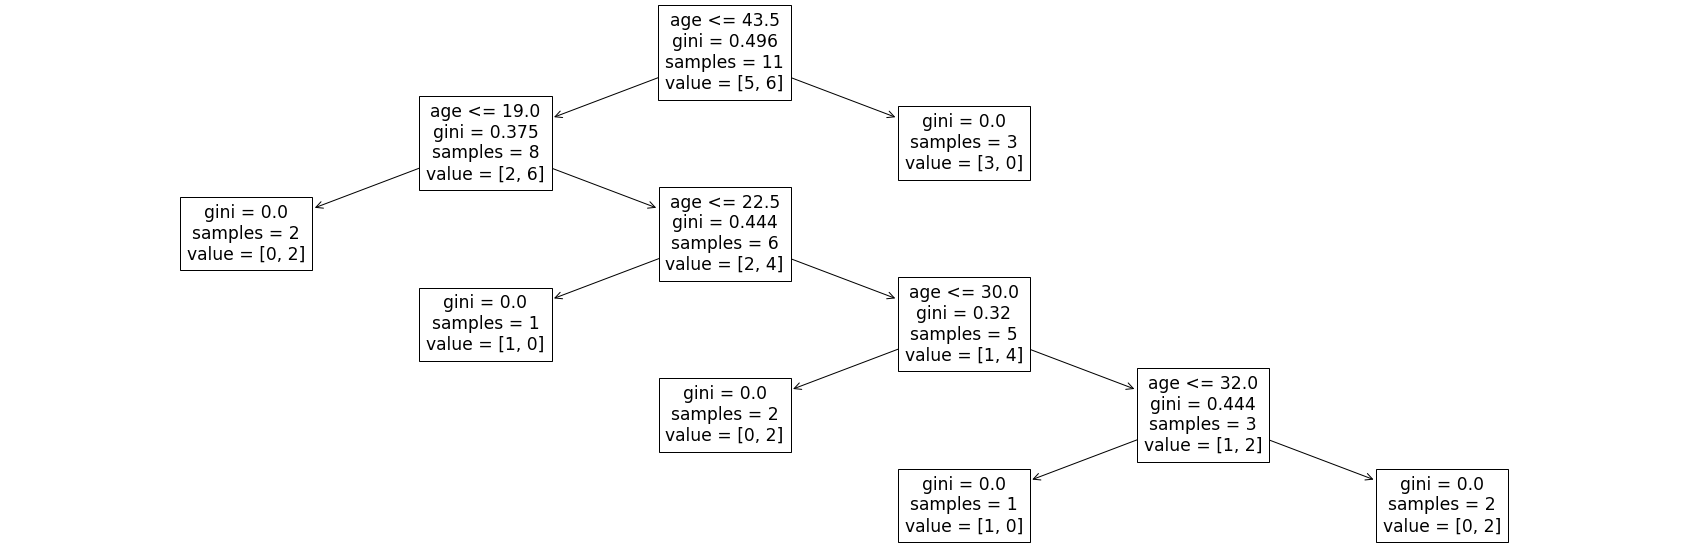

In [301]:
plt.figure(figsize=(30, 10))
plot_tree(age_tree, feature_names=["age"])
plt.show()

Добавим признак зарплата

In [302]:
data_2 = pd.DataFrame({'age':  [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33], 
                       'salary': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
                       'fraud': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]})
data_2

,age,salary,fraud
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


Если отсортировать по возрасту, то таргет меняется (с 1 на 0 или наоборот) 5 раз. А если отсортировать по зарплате – то 7 раз. Как теперь дерево будет выбирать признаки? Посмотрим.

In [303]:
data_2.sort_values('age')

,age,salary,fraud
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [304]:
data_2.sort_values('salary')

,age,salary,fraud
2,18,22,1
0,17,25,1
8,29,33,1
3,20,36,0
4,38,37,1
5,49,59,0
7,25,70,1
6,55,74,0
1,64,80,0
10,33,88,1


In [305]:
age_sal_tree = DecisionTreeClassifier(random_state=RANDOM_SEED)
age_sal_tree.fit(data_2[['age', 'salary']].values, data_2['fraud'].values);

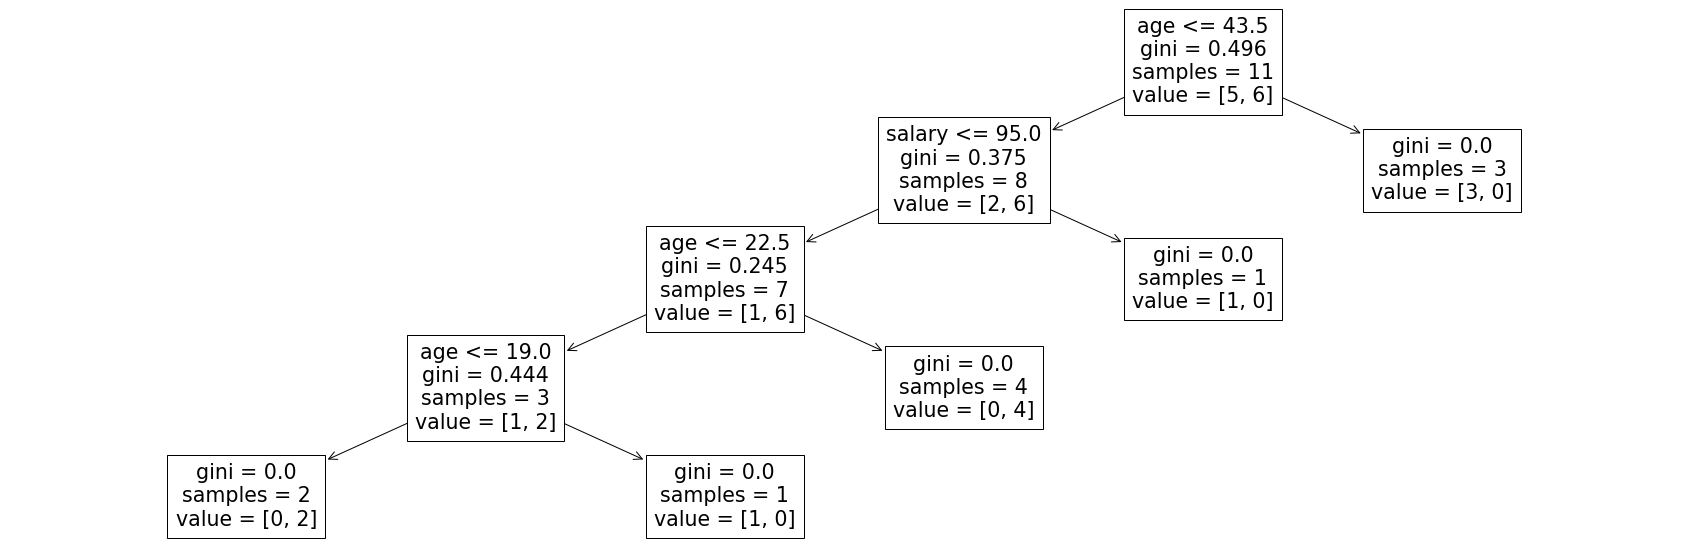

In [306]:
plt.figure(figsize=(30, 10))
plot_tree(age_sal_tree, feature_names=["age", "salary"])
plt.show()

Видим, что в дереве задействованы как разбиения по возрасту, так и по зарплате. Причем пороги, с которыми сравниваются признаки: 43.5 и 22.5 года – для возраста и 95 и 30.5 тыс. руб/мес – для зарплаты. И опять можно заметить, что 95 тыс. – это среднее между 88 и 102, при этом человек с зарплатой 88 оказался "плохим", а с 102 – "хорошим". То же самое для 30.5 тыс. То есть перебирались сравнения зарплаты и возраста не со всеми возможными значениями, а только с несколькими. А почему в дереве оказались именно эти признаки? Потому что по ним разбиения оказались лучше (по критерию неопределенности Джини).

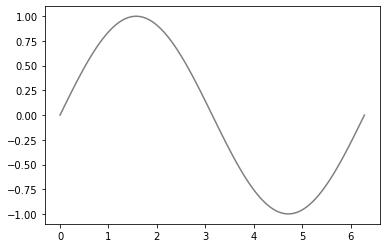

In [309]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y, c='gray');

In [310]:
X_test = np.sort((np.random.rand(50) * 2 * np.pi)).reshape(-1, 1)

$y = f(x) + \varepsilon$

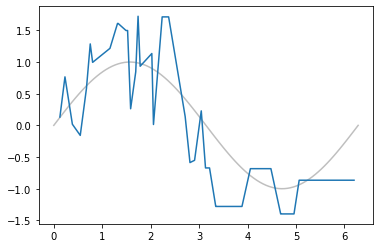

In [315]:
sample_size = 100
X_train = (np.random.exponential(size=100)).reshape(-1, 1)
y_train = np.sin(X_train).reshape(-1) + np.random.uniform(low=-1, high=1, size=sample_size)

regressor = DecisionTreeRegressor(random_state=RANDOM_SEED)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.plot(x, y, c='gray', alpha=0.5);
plt.plot(X_test.reshape(-1), y_pred);

Большая ошибка у регрессора, что можно сделать?

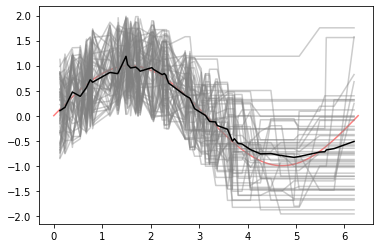

In [318]:
plt.plot(x, y, c='red', alpha=0.5)
sample_size = 100
num_it = 50
avg_pred = np.zeros(X_test.shape[0])

for _ in range(num_it):
    X_train = (np.random.exponential(size=sample_size)).reshape(-1, 1)
    y_train = np.sin(X_train).reshape(-1) + np.random.uniform(low=-1, high=1, size=sample_size)
    regressor = DecisionTreeRegressor(random_state=RANDOM_SEED)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    plt.plot(X_test.reshape(-1), y_pred, c='gray', alpha=0.4)
    avg_pred += y_pred

avg_pred /= num_it
plt.plot(X_test.reshape(-1), avg_pred, c='black', alpha=1);

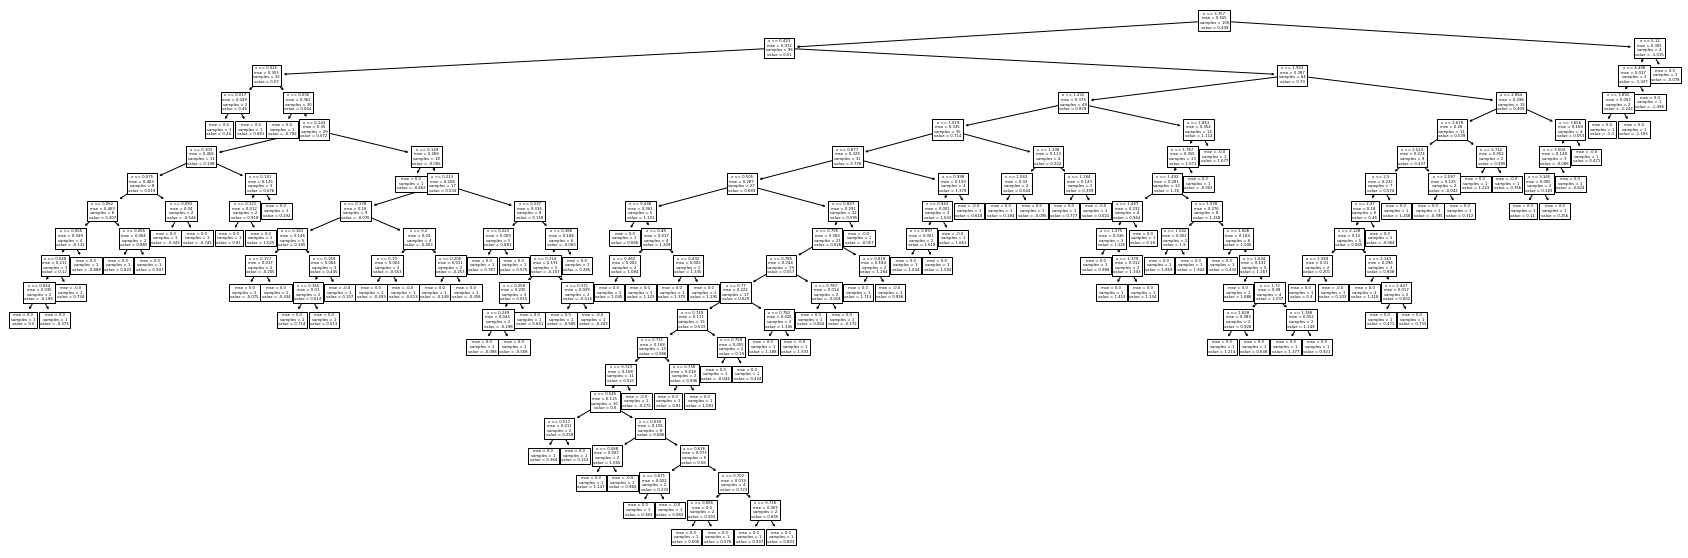

In [10]:
sample_size = 100
X_train = (np.random.exponential(size=sample_size)).reshape(-1, 1)
y_train = np.sin(X_train).reshape(-1) + np.random.uniform(low=-1, high=1, size=sample_size)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

plt.figure(figsize=(30, 10))
plot_tree(regressor, feature_names="x")
plt.show()

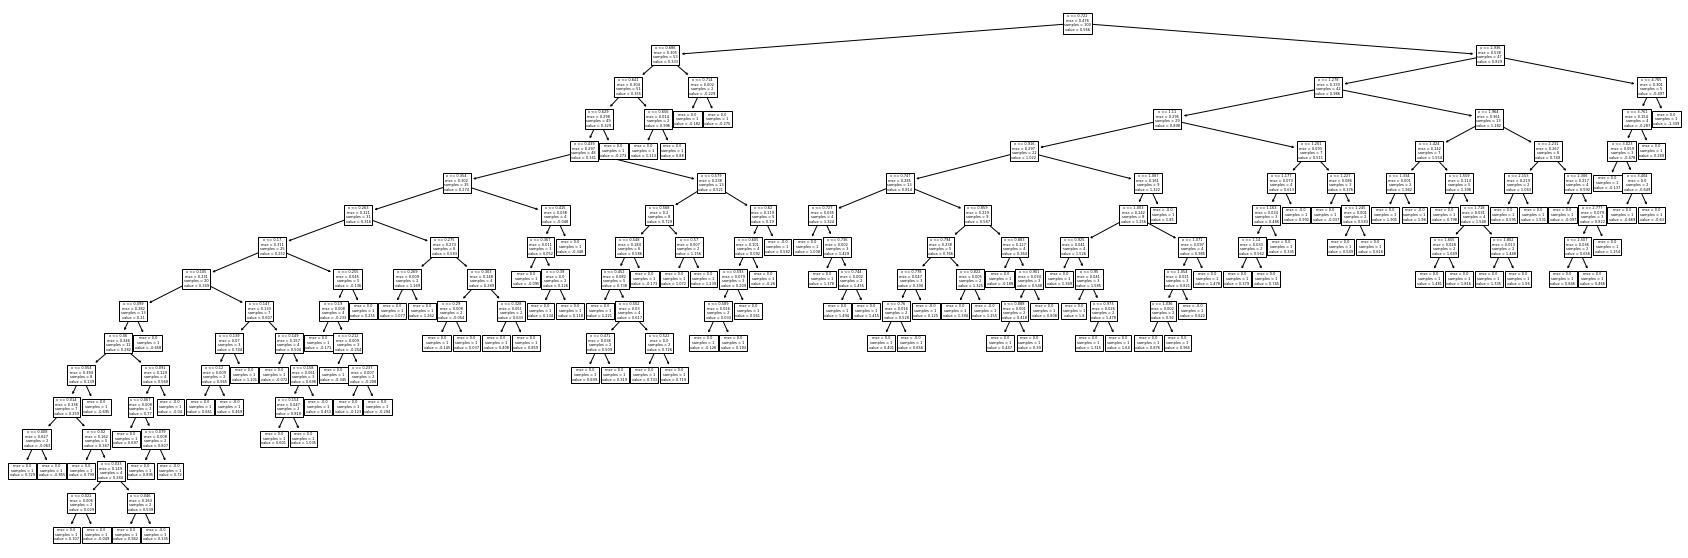

In [146]:
sample_size = 100
X_train = (np.random.exponential(size=sample_size)).reshape(-1, 1)
y_train = np.sin(X_train).reshape(-1) + np.random.uniform(low=-1, high=1, size=sample_size)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

plt.figure(figsize=(30, 10))
plot_tree(regressor, feature_names="x")
plt.show()

## Деревья неустойчивы к изменениям обучающей выборки

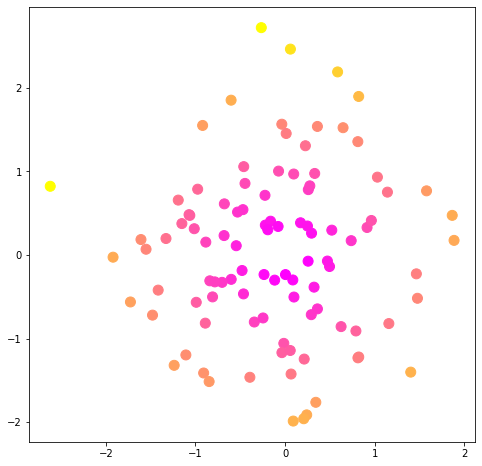

In [250]:
np.random.seed(RANDOM_SEED)
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5 # 
plt.figure(figsize=(8, 8));
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring');

In [251]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

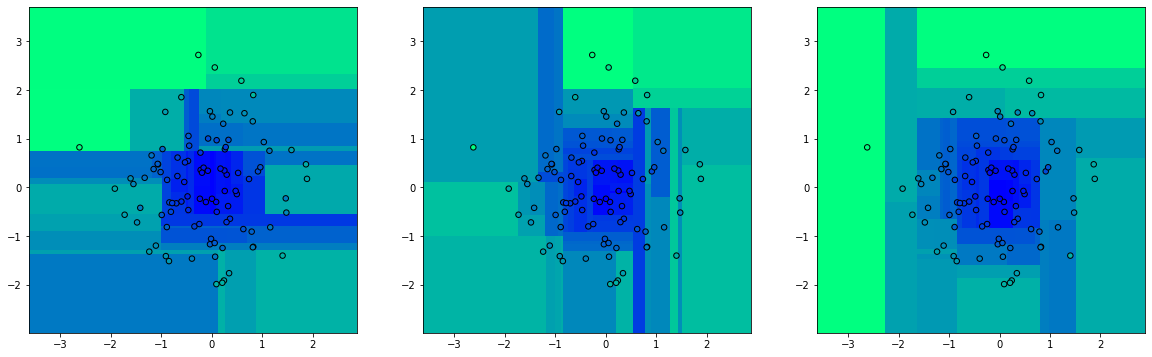

In [253]:
plt.figure(figsize=(20, 6))
for i in range(3):
    reg_tree = DecisionTreeRegressor(random_state=RANDOM_SEED)

    indecies = np.random.randint(data_x.shape[0], size=int(data_x.shape[0] * 0.9))
    reg_tree.fit(data_x[indecies], data_y[indecies])
    xx, yy = get_grid(data_x)
    predicted = reg_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='winter')
    plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='winter', edgecolor='k')

Решающие деревья — это алгоритмы, неустойчивые к изменениям обучающей выборки, т.е. при малейших её изменениях итоговый классификатор может радикально измениться. Посмотрим, как будет меняться структура дерева при обучении на разных 90%-х подвыборках.

## Влияние random_state на построение дерева

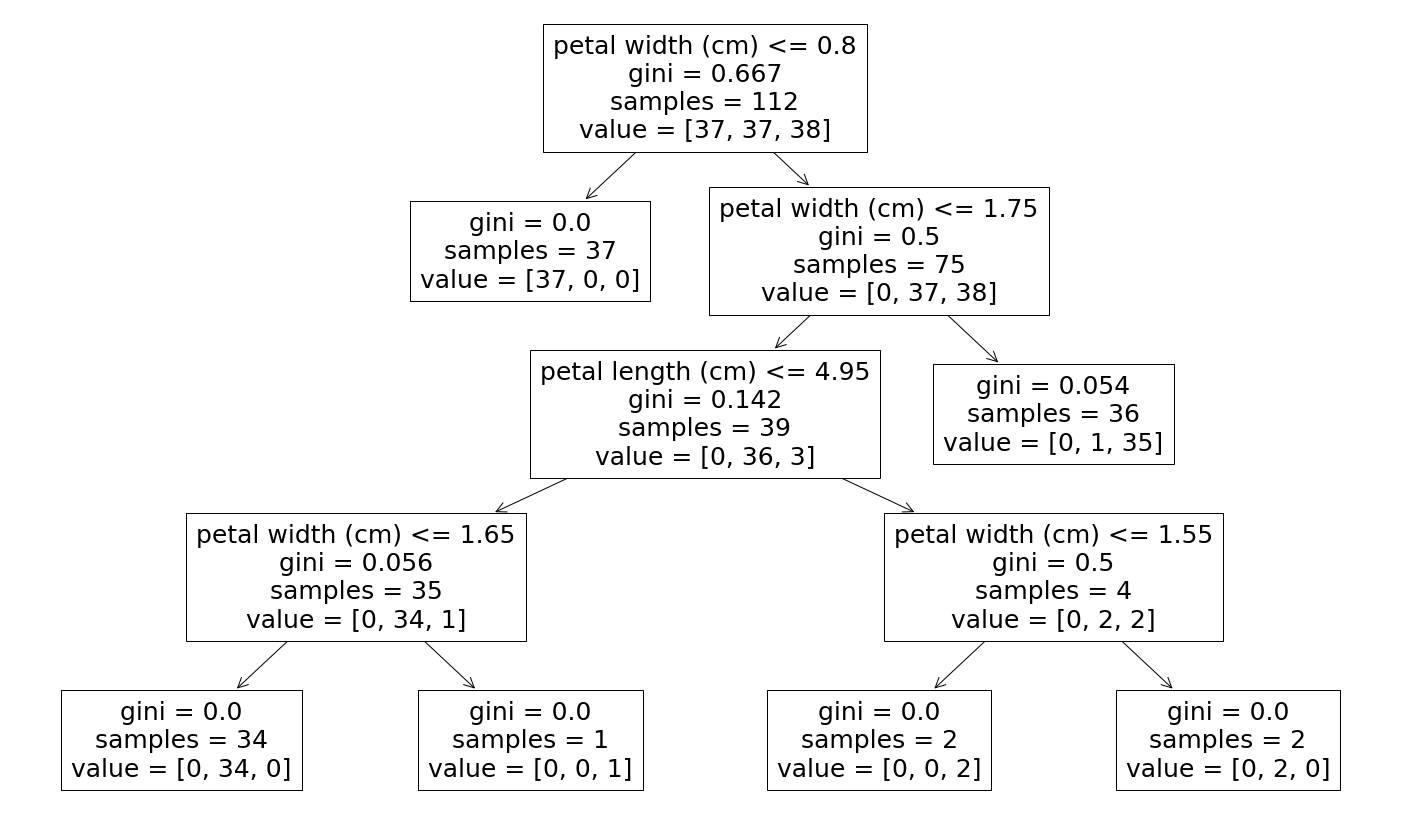

In [319]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=0
)
tree = DecisionTreeClassifier(max_leaf_nodes=6).fit(X_train, y_train)
plt.figure(figsize=(25, 15))
plot_tree(tree, feature_names=iris['feature_names'])
plt.show()

Понятно, что указано в каждом листе и вершине дерева?

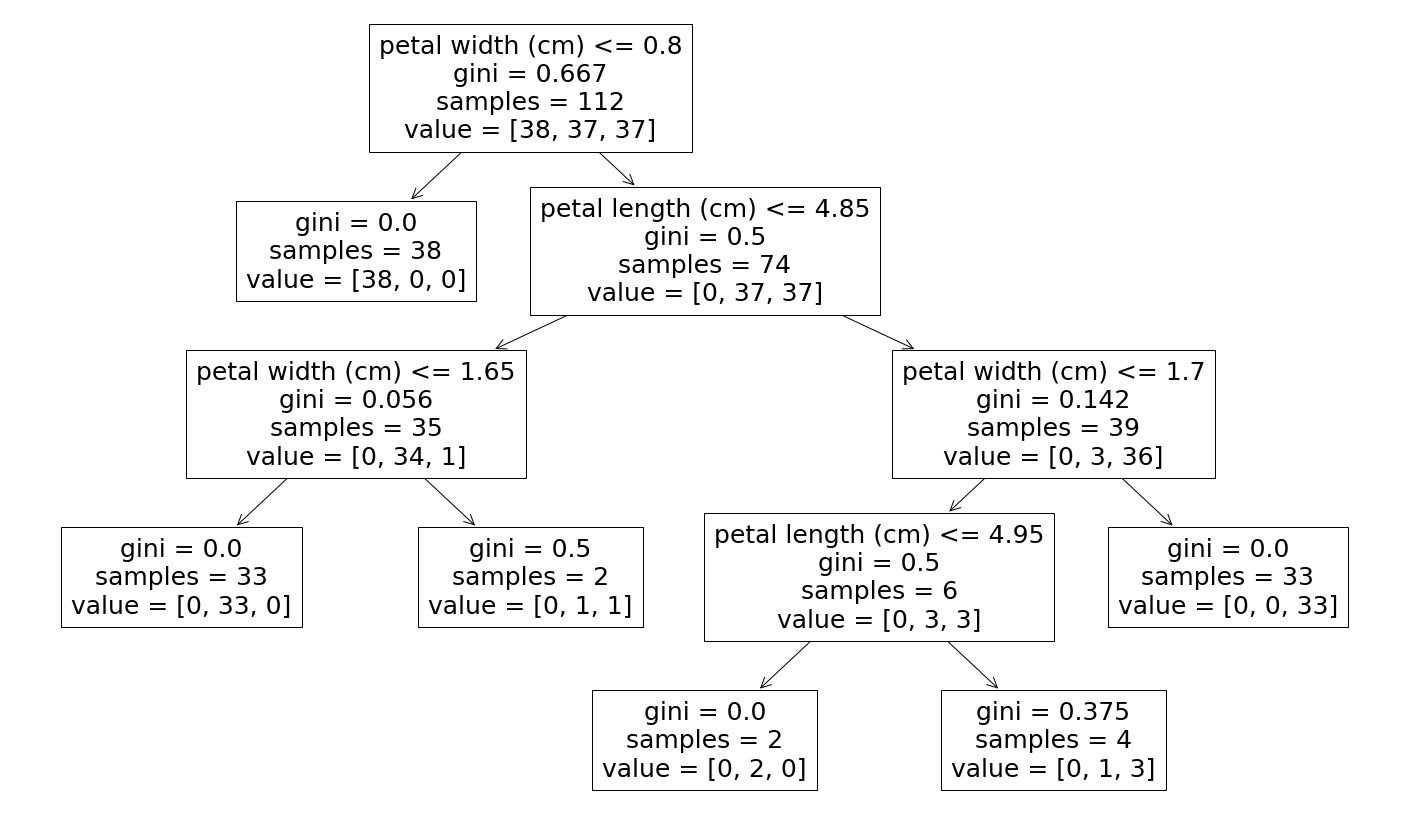

In [337]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=RANDOM_SEED
)
tree = DecisionTreeClassifier(max_leaf_nodes=6).fit(X_train, y_train)
plt.figure(figsize=(25, 15))
plot_tree(tree, feature_names=iris['feature_names'])
plt.show()

Объяснение про random_state:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Overfit

In [214]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED, test_size=0.5)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy train: {acc_train:.4f}")
print(f"Accuracy test: {acc_test:.4f}")

Accuracy train: 1.0000
Accuracy test: 0.8480


In [211]:
X = np.random.rand(1000, 20)
y = np.random.rand(1000).round(0).astype(int)

classifier = DecisionTreeClassifier(max_depth=30)
classifier.fit(X, y)
y_pred = classifier.predict(X)
acc = accuracy_score(y, y_pred)
print(f"Accuracy train: {acc:.4f}")

Accuracy train: 1.0000


Что делать?

# Работа с реальными данными
**Цель:** получить интерпретируемый алгоритм и его визуализировать

Можем по url скачивать данные

In [338]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data")
df

,p,x,s,n,t,p.1,f,c,n.1,k,e,e.1,s.1,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


Как посмотреть описательную статистику о признаках?

In [209]:
df.describe()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [222]:
pd.set_option("display.max_columns", 101)

In [223]:
df.describe()

,p,x,s,n,t,p.1,f,c,n.1,k,e,e.1,s.1,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,4608,3776,5175,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [344]:
df_features = df[df.columns[1:]]
df_target = df[df.columns[0]]

Теперь подсказывайте!

In [345]:
from sklearn.preprocessing import LabelEncoder

df_target = df_target.map({'e':1, 'p':0})
for col in df_features.columns:
    df_features[col] = LabelEncoder().fit_transform(df_features[col].values)
    
df_features.sample(3)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,x,s,n,t,p.1,f,c,n.1,k,e,e.1,s.1,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
2278,2,0,3,1,5,1,0,0,10,1,1,2,2,3,7,0,2,1,4,3,4,0
1210,2,2,4,0,5,1,1,0,7,1,3,2,2,7,7,0,2,1,0,2,0,1
7998,3,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,0,1,4,3,4,2


In [346]:
df_target.value_counts()

1    4208
0    3915
Name: p, dtype: int64

In [347]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, random_state=RANDOM_SEED, test_size=0.5)

In [348]:
classifier = DecisionTreeClassifier(max_depth=7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 1.0000


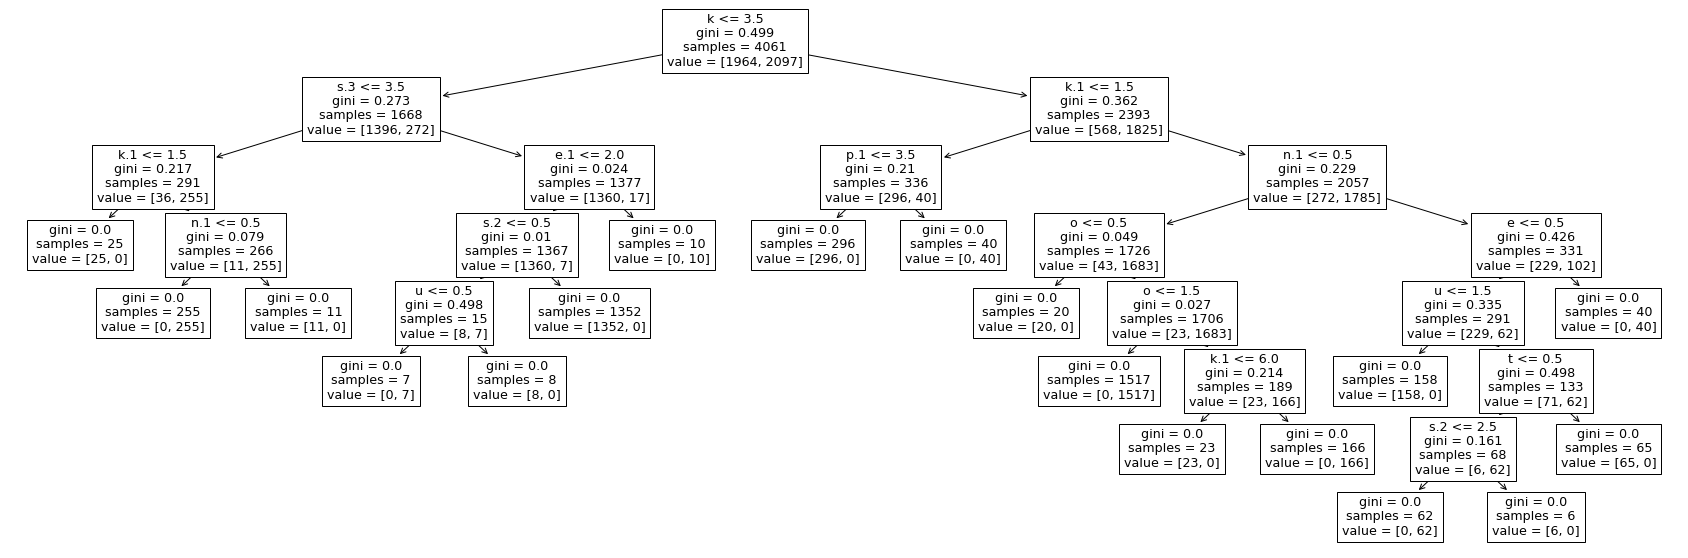

In [349]:
plt.figure(figsize=(30, 10))
plot_tree(classifier, feature_names=X_train.columns)
plt.show()

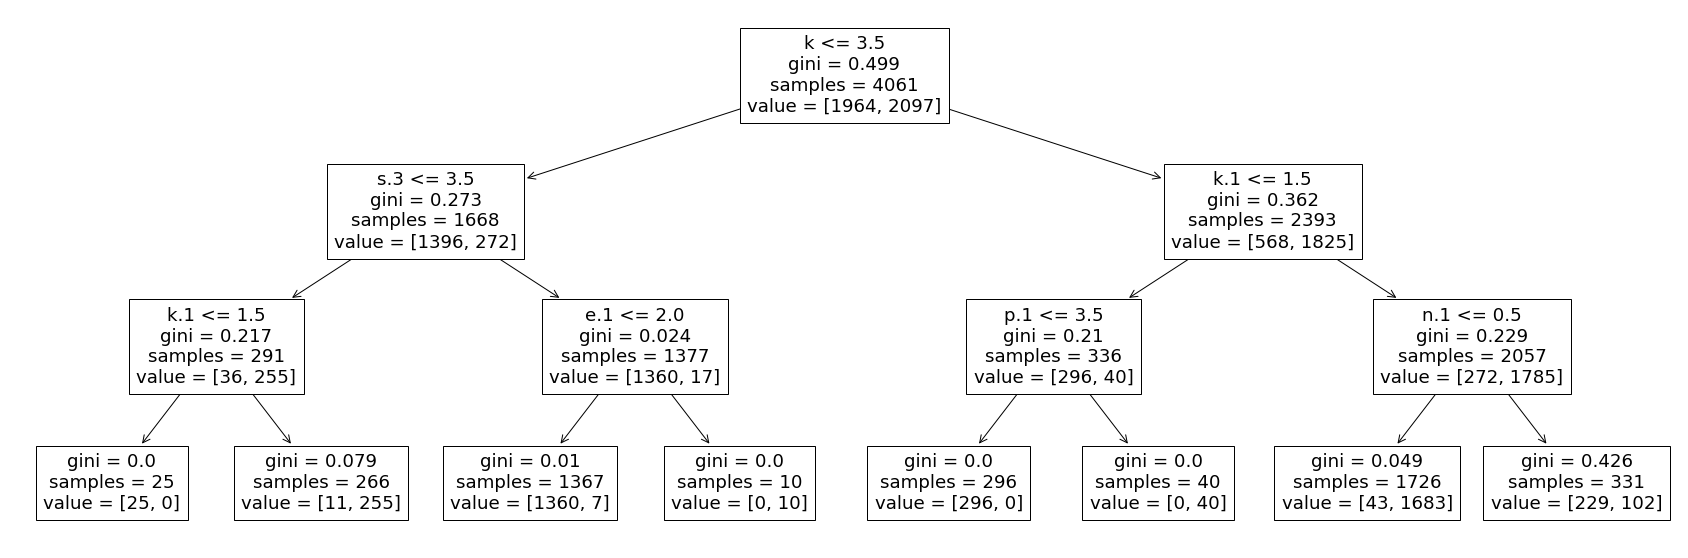

In [200]:
plt.figure(figsize=(30, 10))
plot_tree(classifier, feature_names=X_train.columns)
plt.show()

95,7% доля верно предсказанных значений на глубине всего 3. Можно добавить еще глубины

### Можно ли использовать дерево решений для задачи продолжения ряда (например, временного)?

# Работа с временным рядом

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_friedman2.html

In [350]:
from sklearn.datasets import make_friedman2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_predict

In [351]:
# make a difficult dataset with a linear trend
X, y = make_friedman2(n_samples=1000, random_state=RANDOM_SEED, noise=1)
time = np.arange(1000)
y += time * 1.5  # Добавим временной тренд
X = np.hstack([X, time[:, np.newaxis]])
X_train, y_train = X[:700], y[:700]
X_test, y_test = X[700:], y[700:]

tree = DecisionTreeRegressor(random_state=RANDOM_SEED).fit(X_train, y_train)
y_tree = tree.predict(X_test)

In [267]:
X.shape

(1000, 5)

In [268]:
pd.DataFrame(np.hstack([X, y[:, np.newaxis]]), columns=[f'feature_{i}' for i in range(4)] + ['time', 'y'])

,feature_0,feature_1,feature_2,feature_3,time,y
0,37.454012,1678.777388,0.731994,6.986585,0.0,1230.754077
1,15.601864,380.500750,0.058084,9.661761,1.0,28.865986
2,60.111501,1282.391023,0.020584,10.699099,2.0,68.045685
3,83.244264,472.546861,0.181825,2.834045,3.0,124.588116
4,30.424224,982.920600,0.431945,3.912291,4.0,431.197001
...,...,...,...,...,...,...
995,83.236354,1441.794298,0.224319,3.260791,995.0,1825.713311
996,81.730531,1645.588784,0.095361,5.500586,996.0,1671.923084
997,33.745428,1548.044903,0.083525,3.111259,997.0,1628.913975
998,75.246834,209.458783,0.492535,5.421070,998.0,1625.217959


Построим линейную модель

In [355]:
linear = LinearRegression().fit(X_train, y_train)
y_lin = linear.predict(X_test)

In [356]:
print(r2_score(y_test, y_tree))
print(r2_score(y_test, y_lin))

0.3536701053439897
0.8756161269211847


In [357]:
print(mean_absolute_error(y_test, y_tree))
print(mean_absolute_error(y_test, y_lin))

280.6630345040494
107.87338825752525


In [358]:
np.mean(y_test), np.median(y_test), np.std(y_test)

(1741.3213243278033, 1629.7038822330705, 406.9648864479481)

Построим стэкинг двух алгоритмов

In [359]:
# build a stack of two models
lin_resid = y_train - linear.predict(X_train)
tree2 = DecisionTreeRegressor(random_state=RANDOM_SEED).fit(X=X_train, y=lin_resid)
y_stack = y_lin + tree2.predict(X_test)

print(r2_score(y_test, y_stack))

0.9846136563490197


In [360]:
print(mean_absolute_error(y_test, y_stack))

24.114488669251497


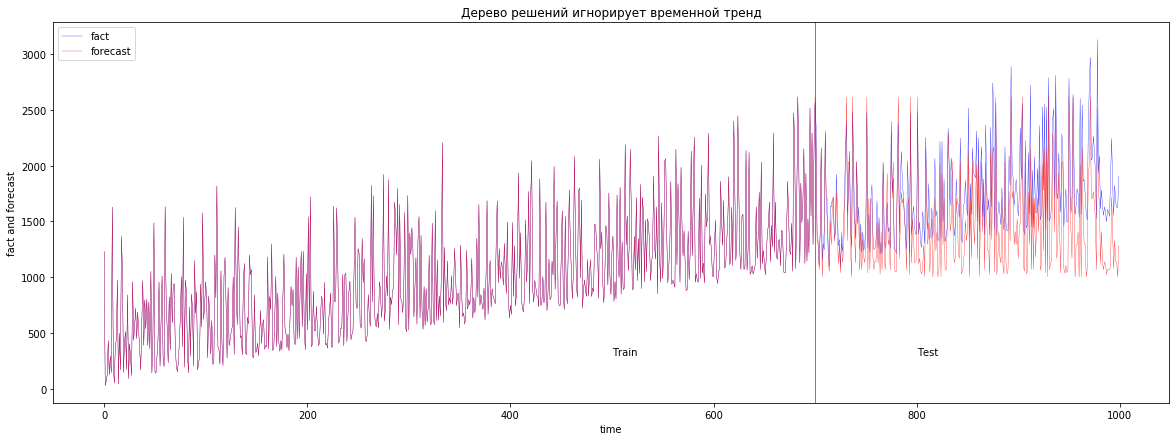

In [361]:
%matplotlib inline
plt.figure(figsize=(20, 7));
plt.plot(time, y, color='blue', lw=0.3)
plt.plot(time, tree.predict(X), color='red', lw=0.3)
ylim = plt.ylim()
plt.ylim(ylim)
plt.xlabel('time')
plt.legend(['fact', 'forecast'])
plt.ylabel('fact and forecast')
plt.title('Дерево решений игнорирует временной тренд')
plt.vlines(700, *ylim, lw=1, color='grey')
plt.text(500, 300, 'Train'); plt.text(800, 300, 'Test');

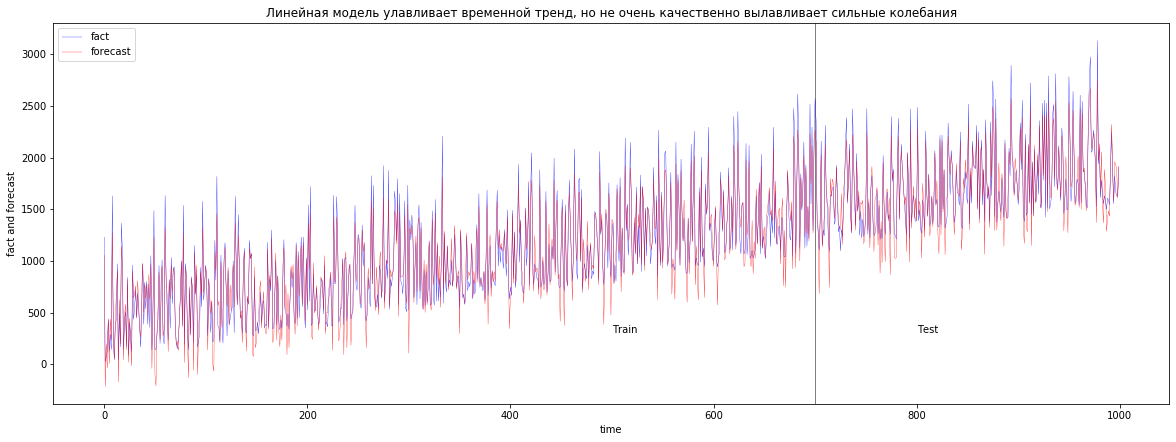

In [362]:
plt.figure(figsize=(20, 7));
plt.plot(time, y, color='blue', lw=0.3)
plt.plot(time, linear.predict(X), color='red', lw=0.3)
ylim = plt.ylim()
plt.ylim(ylim)
plt.xlabel('time')
plt.legend(['fact', 'forecast'])
plt.ylabel('fact and forecast')
plt.title('Линейная модель улавливает временной тренд, но не очень качественно вылавливает сильные колебания')
plt.vlines(700, *ylim, lw=1, color='grey')
plt.text(500, 300, 'Train'); plt.text(800, 300, 'Test');

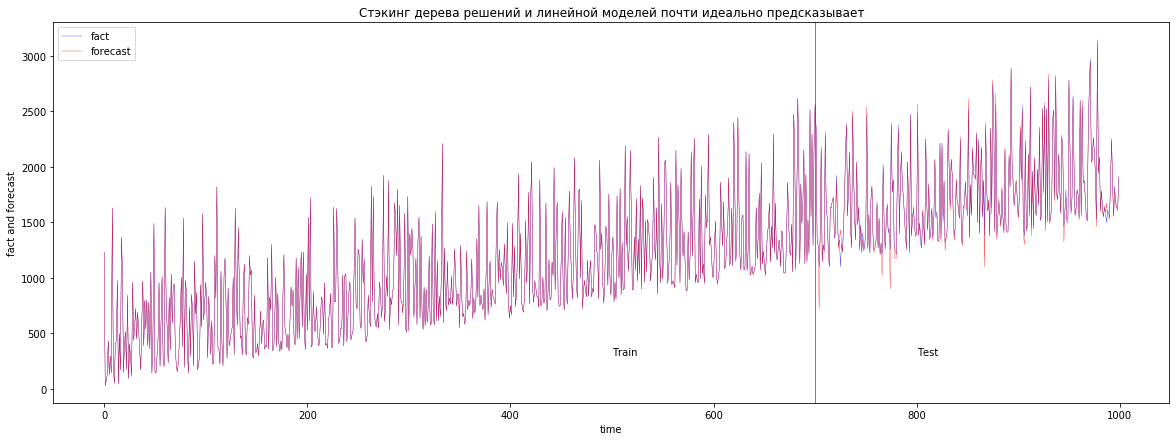

In [363]:
plt.figure(figsize=(20, 7));
plt.plot(time, y, color='blue', lw=0.3)
plt.plot(time, linear.predict(X) + tree2.predict(X), color='red', lw=0.3)
ylim = plt.ylim()
plt.ylim(ylim)
plt.xlabel('time')
plt.legend(['fact', 'forecast'])
plt.ylabel('fact and forecast')
plt.title('Стэкинг дерева решений и линейной моделей почти идеально предсказывает')
plt.vlines(700, *ylim, lw=1, color='grey')
plt.text(500, 300, 'Train'); plt.text(800, 300, 'Test');

Feature ranking:
1. feature 4 (0.408028)
2. feature 2 (0.318398)
3. feature 1 (0.266159)
4. feature 0 (0.003862)
5. feature 3 (0.003552)


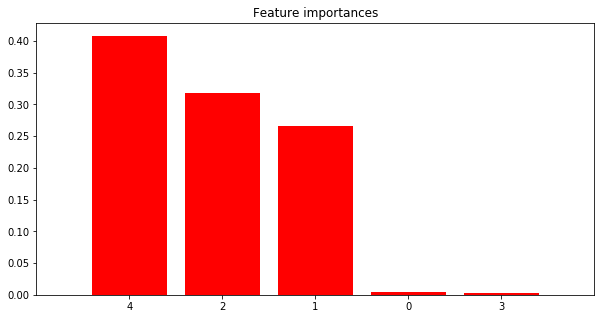

In [275]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the tree
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. feature 2 (0.502429)
2. feature 1 (0.490090)
3. feature 4 (0.005154)
4. feature 0 (0.001652)
5. feature 3 (0.000675)


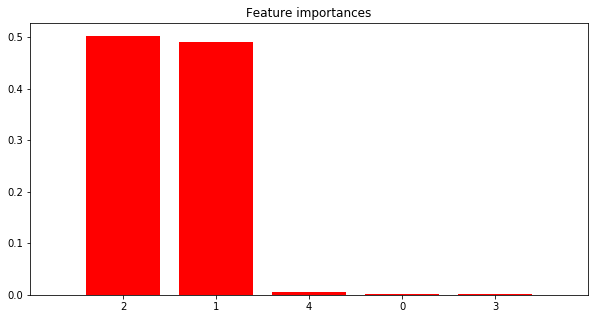

In [276]:
importances = tree2.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the tree
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3#:~:text=Feature%20importance%20is%20calculated%20as,the%20more%20important%20the%20feature.